# Challenge Modelos Regessivos
## Desafio: Estimando o Preço do Imóvel

Suponha que você trabalha em uma empresa do setor imobiliário. Após explorar as principais variáveis que impactam o preco dos imóveis, na semana passada, pediram para você, do time de dados, construir um modelo que estime o preço de um imóvel.
Para isso, você utilizará a mesma base de dados da semana anterior
(desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?
A base contém as seguintes informações:
- id : código identificador do imóvel
- date: data em que o imóvel foi cadastrado
- price: preço do imóvel
- bedrooms: número de quartos
- bathrooms: número de banheiros
- sqft_living: tamanho do imóvel (dentro da casa)
- sqft_lot: tamanho do lote / terreno
- floors: andares
- waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso contrário.
- view: indica o número de quartos com vista.
- condition: condição do imóvel, escala de 1 a 5
- grade: nota do imóvel
- sqft_above: tamanho da casa acima do solo (excluindo porão)
- sqft_basement: tamanho do porão
- yr_built: ano em que a casa foi construída
- yr_renovated: ano em que a casa foi renovada
- zipcode: "CEP" do imóvel
- lat: latitude do imóvel
- long: longitude do imóvel

1. Selecione as principais variáveis que você gostaria de incluir no modelo de precificação do imóvel.
2. Construa um modelo de regressão linear multivariada para estimar o preço do imóvel. Lembre-se de: Analisar a tabela de regressão e os resíduos do modelo e interprete os resultados
3. Suponha agora que você encontrou um modelo ideal. Explique como você faria para colocar esse modelo em produção? Entenda por modelo em produção um modelo que a cada apartamento novo inserido na base precifique-o com base no seu modelo. 

Materiais de apoio:
https://medium.com/creditas-tech/terminei-a-modelagem-e-agora-parte-i-604232bb5114
https://medium.com/analytics-vidhya/deploying-linear-regression-ml-model-as-web-application-on-docker-3409f9464a27 (conteúdo em inglês: utilizar google tradutor caso necessário)

https://docs.microsoft.com/en-us/sql/machine-learning/tutorials/python-ski-rental-linear-regression-deploy-model?view=sql-server-ver15 (conteúdo em inglês: utilizar google tradutor caso necessário)

## Importação das bibliotecas

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
# Suprimindo notação científica
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Importação dos dados

In [25]:
df = pd.read_csv('./dados/desafio_01_preco_imoveis.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [27]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390
std,2876565571.31205,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500


## Seleção das variáveis independentes

As variáveis independentes serão escolhidas com base no grau de correlação linear com a variável resposta. Dessa forma, as variáveis com maiores correlações com o preço são:

In [28]:
corr = df.corr()
corr['price'].sort_values(ascending=False)

price            1.00000
sqft_living      0.70204
grade            0.66743
sqft_above       0.60557
bathrooms        0.52514
view             0.39729
sqft_basement    0.32382
bedrooms         0.30835
lat              0.30700
waterfront       0.26637
floors           0.25679
yr_renovated     0.12643
sqft_lot         0.08966
yr_built         0.05401
condition        0.03636
long             0.02163
id              -0.01676
zipcode         -0.05320
Name: price, dtype: float64

Podemos considerar as variáveis sqft_living, grade, sqft_above e bathrooms para a criação do nosso modelo. No entanto, é importante verificar se essas variáveis possuem forte correlação entre si, a fim de tornar a explicação do modelo mais robusta. Isso ocorre porque a multicolinearidade, ou seja, a alta correlação entre as variáveis independentes, torna mais difícil separar os efeitos individuais de cada variável no modelo.

In [29]:
# Verificando a existência de variáveis altamente correlacionadas
corr[((corr.abs() < 1) & (corr.abs() > 0.7))].dropna(how='all').dropna(axis=1,how='all').fillna('')

,price,bathrooms,sqft_living,grade,sqft_above
price,,,0.70204,,
bathrooms,,,0.75467,,
sqft_living,0.70204,0.75467,,0.76270,0.87660
grade,,,0.76270,,0.75592
sqft_above,,,0.87660,0.75592,


Utilizando o limiar de corelação de 0.7, percebemos que sqft_living tem alta correlação com as demais variáveis escolhidas, assim como grade e sqft_above também têm forte correlação. Então, optaremos por excluí-las do nosso primeiro modelo.

Para o segundo modelos, podemos utilizar o limiar de 0.8 e compará-lo com o 0.7.

## Separação do conjunto de treino e teste

In [30]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df[['bathrooms', 'sqft_above']]
X2 = df[['bathrooms', 'grade', 'sqft_above']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)

## Treinamento dos modelos

In [31]:
model = LinearRegression()
model2 = LinearRegression()

In [32]:
model.fit(X_train, y_train)
model2.fit(X2_train, y2_train)

LinearRegression()

## Teste

In [33]:
print(f'Modelo 1: R² = {model.score(X_train, y_train).round(2)}')
print(f'Modelo 2: R² = {model2.score(X2_train, y2_train).round(2)}')

Modelo 1: R² = 0.39
Modelo 2: R² = 0.47


Como esperado o R2 do segundo modelo é maior, já que o mesmo tem mais variáveis explicativas.

In [34]:
y_pred = model.predict(X_test)
y2_pred = model2.predict(X2_test)

In [35]:
print(f'Modelo 1: R² = {model.score(X_test, y_test).round(2)}')
print(f'Modelo 2: R² = {model2.score(X2_test, y2_test).round(2)}')


Modelo 1: R² = 0.38
Modelo 2: R² = 0.47


In [36]:
MSE = metrics.mean_squared_error(y_test, y_pred).round(2)
RMSE = np.sqrt(MSE)
R2 = metrics.r2_score(y_test, y_pred)

pd.DataFrame(
    [MSE, RMSE, R2],
    ['MSE', 'RMSE', 'R²'],
    columns=['Métricas']
    )

,Métricas
MSE,89118603177.78999
RMSE,298527.39100
R²,0.38269


In [37]:
MSE_2 = metrics.mean_squared_error(y2_test, y2_pred).round(2)
RMSE_2 = np.sqrt(MSE_2)
R2_2 = metrics.r2_score(y2_test, y2_pred)

pd.DataFrame(
    [MSE_2, RMSE_2, R2_2],
    ['MSE', 'RMSE', 'R²'],
    columns=['Métricas']
    )

,Métricas
MSE,76790153571.98000
RMSE,277110.36352
R²,0.46809


O erro quadrático médio indica que o segundo modelo tem melhor ajuste. Assim, este será o escolhido.

# Análise dos resíduos.

<img width='800px' src='.\imagens\var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

In [38]:
y2_pred_train = model2.predict(X2_train)
residuo = y2_train - y2_pred_train
residuo

167      -16061.67165
12412    194013.19432
7691    -308315.61252
12460    -74098.19065
9099     -34021.45071
             ...     
11964     26922.79907
21575   -319054.86986
5390      84472.76089
860      260569.61717
15795   -266913.00129
Name: price, Length: 15129, dtype: float64

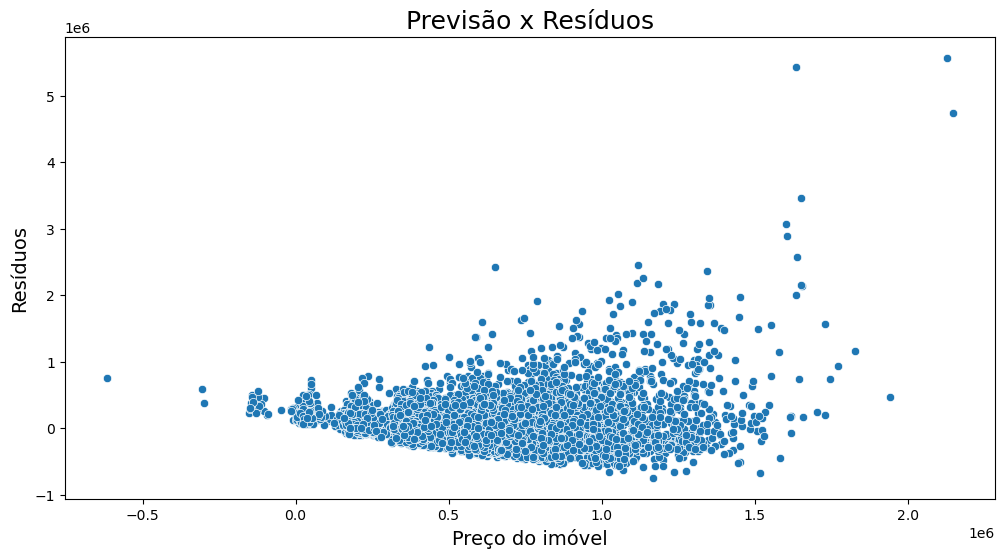

In [39]:
ax = sns.scatterplot(x=y2_pred_train, y=residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Resíduos', fontsize=18)
ax.set_ylabel('Resíduos', fontsize=14)
ax.set_xlabel('Preço do imóvel', fontsize=14)
plt.show()

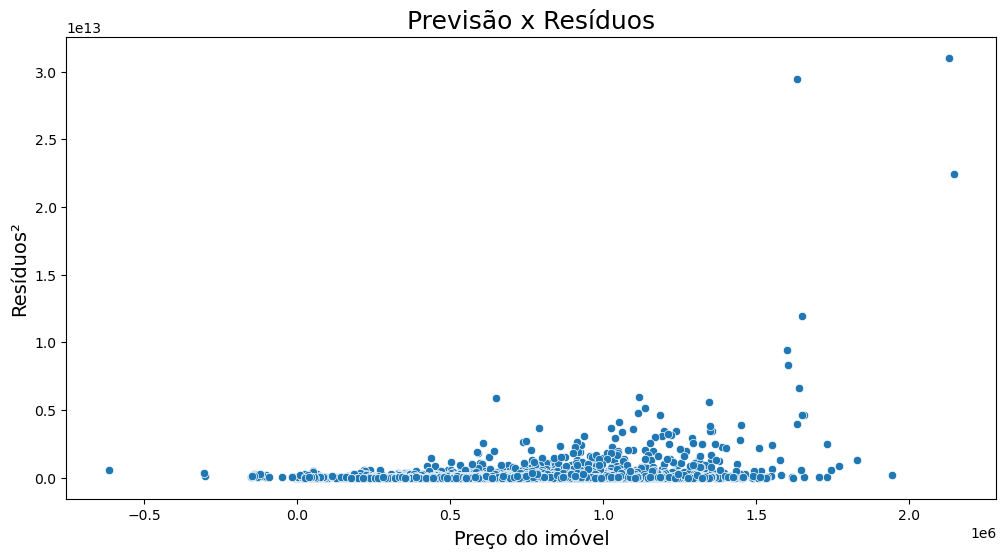

In [40]:
ax = sns.scatterplot(x=y2_pred_train, y=residuo**2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Resíduos', fontsize=18)
ax.set_ylabel('Resíduos²', fontsize=14)
ax.set_xlabel('Preço do imóvel', fontsize=14)
plt.show()

<Figure size 1600x800 with 0 Axes>

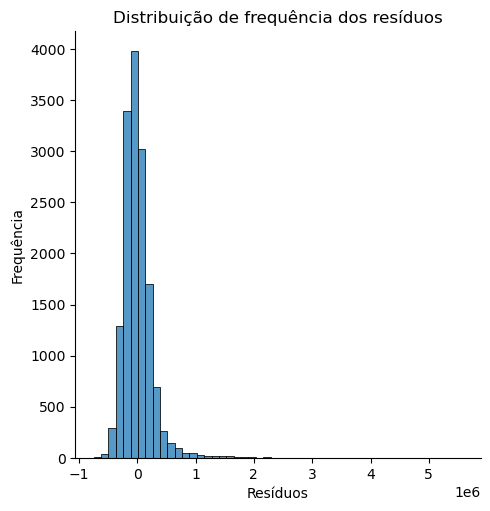

In [41]:
plt.figure(figsize=(16, 8))
ax = sns.displot(residuo, bins=50)

ax.set(title='Distribuição de frequência dos resíduos')
ax.set(xlabel='Resíduos', ylabel='Frequência')

plt.show()

Pelo o gráficos dos resíduos, nota-se que a variância do modelo não é constante.

## Análise da tabela de regressão

Utilizando statsmodels.api conseguimos a seguinte tabela:

In [42]:
model = sm.OLS(y2_train, X2_train)
results = model.fit()
y_pred = results.predict(X2_test)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                          2.186e+04
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        10:22:40   Log-Likelihood:                     -2.1125e+05
No. Observations:               15129   AIC:                                  4.225e+05
Df Residuals:                   15126   BIC:                                  4.225e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

O método usado pelas funções OLS() e pela LinearRegression() é o mesmo. Assim a reta de regressão gereda é a mesma para um mesmo conjunto de dados.

Pelo summar podemos chegar às seguintes conclusões:
- R-square e Adj. R-square: o coeficiente de determinação é uma métrica que busca rsumir o quanto da variação da variável dependente é explicada pelas variáveis indepedetes. Podendo variar entre 0 e 1, quanto mair próximo a 1, maior a capacidade explicativa. Entretanto, o R-square é sensível ao número de variáveis independentes utilizadas, quanto maior a quantidade de variáveis explicativas, mais o valor de aproxima de 1. Neste cenário, temos o Adj. R-square, o valor de R-square ajustado que pode ser utilizado para comparar modelos com quantidade diferentes de variáveis explicativas. Na nossa regressão, nós obtvemos o valor de 0.813 para ambas as métricas. O que demonstra uma boa explicabilidade. Além disso, os valores serem iguais pode indicar que todas as variáveis são relevantes para o modelo.
- F-statistics e Prob (F-statistic): esta métrica testa a hipótese nula de que todos os coefs são nulos, ou seja, compara o modelo com outro onde apenas existe o intercepto. Valores maiores indicam melhor significância para o modelo. A Prob (F-statistics) é o valor p associado ao teste f. Conseguimos obter $2.186 * 10^4$ para F-statistics e um p-valor < 0,01. Assim, podemos concluir que pelo menos uma das variáveis é significativa para o modelo.
- bathrooms: o coeficiente de banheiros é $5.243*10^4$, o que significa que para cada banheiro existente haverá um aumento de 5.243*10^4 doláres no valor do imóvel. O valor para o erro padrão foi de 4286.584. Com um t teste, que testa a significancia do modelo, de 12.231 p-valor < 0,01. O que indica que a variável e estatísticamente significativa para o modelo. A coluna  [0.025      0.975], traz faixa na qual, com um nível de confiança de 95%, o valor verdadeiro do coeficiente deve estar. No caso da variável bathrooms, temps a faixa de $4.4 * 10^4$ a $6.08 * 10^4$. Notamos que a faixa não engloba o número 0, o que corrobora o raciocío desenvolvido onde não aceitams aonde a hipótese de que os coeficientes são nulos.
- grade: para o nota do imóvel podemos aplicar a lógica anterior para analisar sas métricas. Concluindo que esta variável é significativa para o modelo e que a cada ponto na nota o valor do imóvel aumenta em $1.462 * 10^4$ dólares.
- sqft_above: da mesma maneira, a área acima do solo também se mostrou significativa para o modelo, onde o acréscimo de uma unidade em seu valor aumenta o valor do imóvel em 183.4684 dólares.
- Omnibus: valores próximos a zero indicam indica a normalidade dos resíduos. O resultado de                  13233.416 corrobora a conclusão feita através da análise gráfica, os resíduos não estão normalmente distribuidos. 
- Prob(Omnibus): é o p-valor do Omnibus e valores próximos a zero indicam a não normalidade dos resíduos.
- Durbin-Watson: é uma medida da autocorrelação entre os resíduos, valores próximos a 2 indicam que não há autocorrelação. Obtivemos o valor 2.014, que é próximo a dois.
- Jarque-Bera (JB): testa a hipótese nula de que os dados se distribuem como uma nrmal e leva em consideação o número de observações, o coeficiente de simetria e o coeficiente de curtosi.       967466.766
- Skew: indica a assimetria dos redíduos, valores próximos a zero indicam que não há assimetria. Obtivemos o valor de 3.859, que indica assimetria e conseguimos ver está assimétria na análise gráfica dos resíduos.   
- Cond. No,: o número condicional alto indica que possa haver alta colinearidade ou outros problemas numéricos com o modelo.                  


## Modelo em produção

Para colocar um modelo em produção, é preciso seguir algumas etapas importantes. A primeira delas é salvar o modelo de forma que ele possa ser compartilhado. Para isso, podemos usar a biblioteca Pickle, que permite serializar e deserializar objetos Python. Isso significa que podemos salvar o modelo em uma representação binária que pode ser armazenada em disco ou compartilhada, e depois deserializá-lo para obter o objeto original. Isso é importante porque o treinamento do modelo e sua utilização devem ocorrer separadamente.

Depois de salvar o modelo, precisamos disponibilizá-lo para uso por meio de uma API. Existem várias linguagens e frameworks que podem ser usados para criar uma API. Em python, o Flask é uma biblioteca fácil de usar para criar aplicativos web e que pode ser utilizada para esse proposito.

Além de disponibilizar o modelo, é importante monitorar seu desempenho para garantir a qualidade das previsões. Isso pode ser feito por meio de testes automatizados e análises regulares dos resultados. Também é importante atualizar periodicamente o modelo com novos dados de treinamento para garantir que ele continue a produzir resultados precisos ao longo do tempo.

Em resumo, para colocar um modelo em produção, é preciso salvar o modelo, disponibilizá-lo por meio de uma API, monitorar seu desempenho e atualizá-lo com novos dados de treinamento. O processo pode ser complexo, mas seguir essas etapas ajudará a garantir que o modelo seja eficaz e confiável em produção.

In [43]:
import pickle

output = open('modelo_previficacao_imoveis', 'wb')
pickle.dump(model2, output)
output.close()

In [48]:
modelo = open('modelo_previficacao_imoveis','rb')
lm_new = pickle.load(modelo)
modelo.close()

entrada = X2_test[0:1]
print(f'{lm_new.predict(entrada)[0].round(2)} dólares')

617457.9 dólares


In [45]:
X2_train

,bathrooms,grade,sqft_above
167,2.50000,9,2680
12412,1.75000,7,1170
7691,2.25000,8,2190
12460,1.75000,9,1890
9099,1.75000,8,2110
...,...,...,...
11964,1.50000,7,1000
21575,2.50000,8,3087
5390,2.50000,7,2120
860,0.75000,5,380


In [46]:
def predict_value():   
    bathrooms = int(input('Quantidade de banheiros: '))
    grade = int(input('Nota do imóvel: '))
    sqft_above = float(input('Tamanho do imóvel acima do solo: '))

    imovel = pd.DataFrame(
        {
            'bathrooms': bathrooms,
            'grade': grade,
            'sqft_above': sqft_above,
        },
        index=[0]
    )

    print(f'O valor estimado do imóvel é: {lm_new.predict(imovel)[0]}')

